# Analyze Final Models: LCIA QSAR Study
**Date:** June 2, 2023 <br>

In [1]:
from joblib import load
import pandas as pd 
import plot

import os.path
from configuration import BaseConfiguration

workflow = load(os.path.join('Temporary', 'workflow.joblib'))
wf_new = load('workflow.joblib')

config = BaseConfiguration('Input/plotting-configuration.json')

path_configs = [k for k in wf_new.__dict__ if 'file' in k or 'dir' in k]

for k, v in wf_new.__dict__.items():
    
    if k in path_configs:
        setattr(workflow, k, v)
        
    elif k == 'function_for_metric':
        setattr(workflow, k, v)

## Dataset characterization

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\lcia_qsar\plot.py:332: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\General-Toxicity-Reproductive-Developmental-Toxicity.png"


C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\lcia_qsar\plot.py:332: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\All-Chemicals.png"


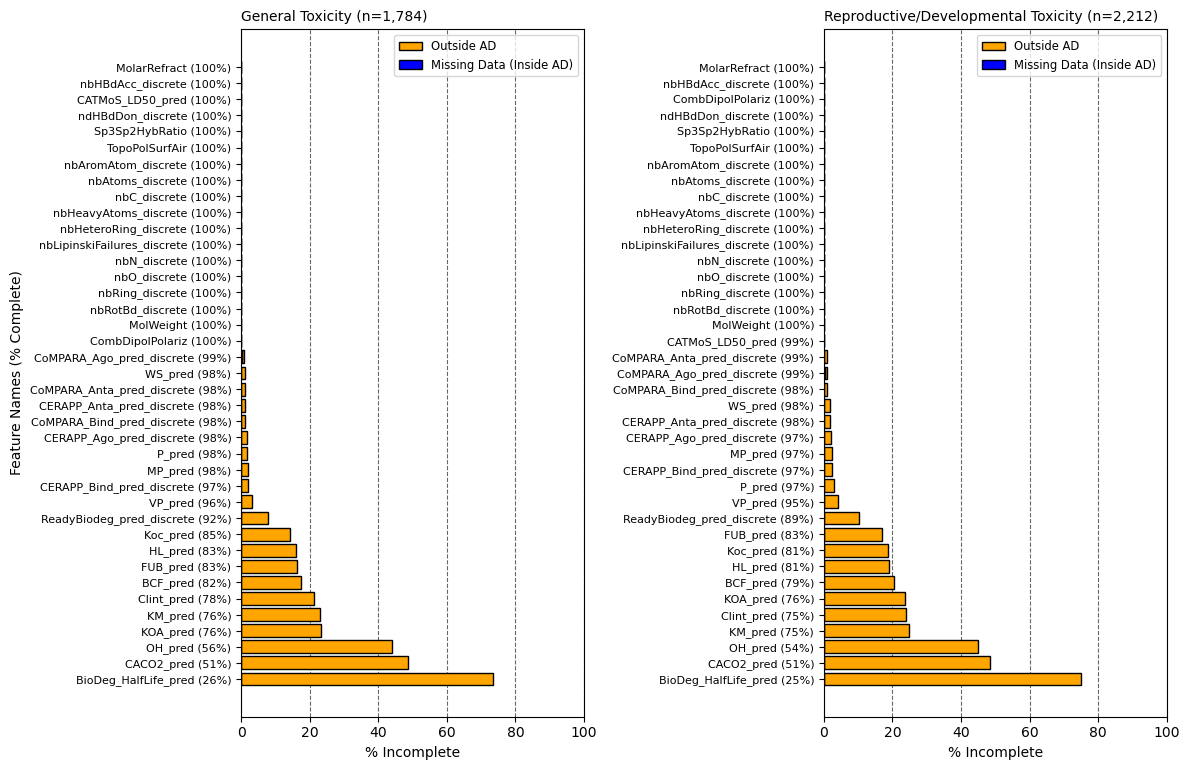

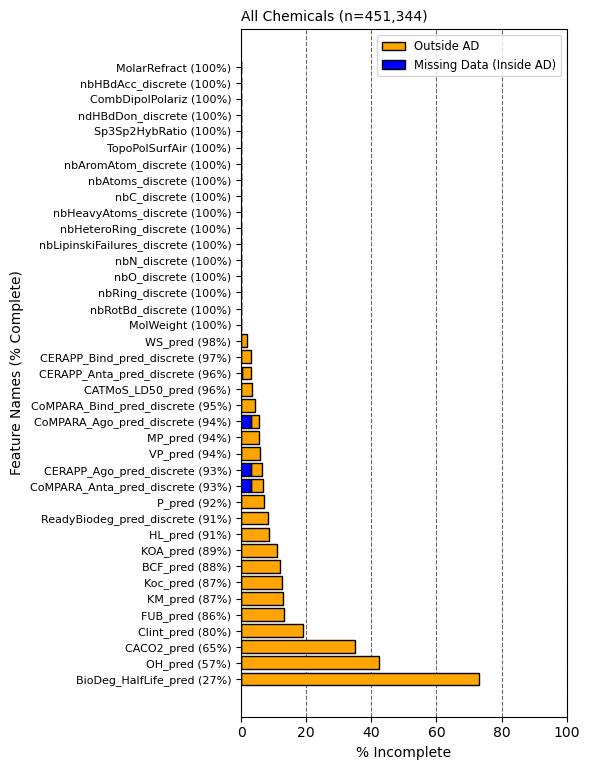

In [2]:
plot.proportions_incomplete_subplots(
    workflow.file_for_features_source['opera'], 
    workflow.opera_AD_file, 
    workflow.surrogate_pods_file, 
    config.label_for_effect,
    config.all_chemicals_label
)

Saving figure --> "Figures\pairwise_scatters_and_kde_subplots\all-opera-features-and-target-union.png"


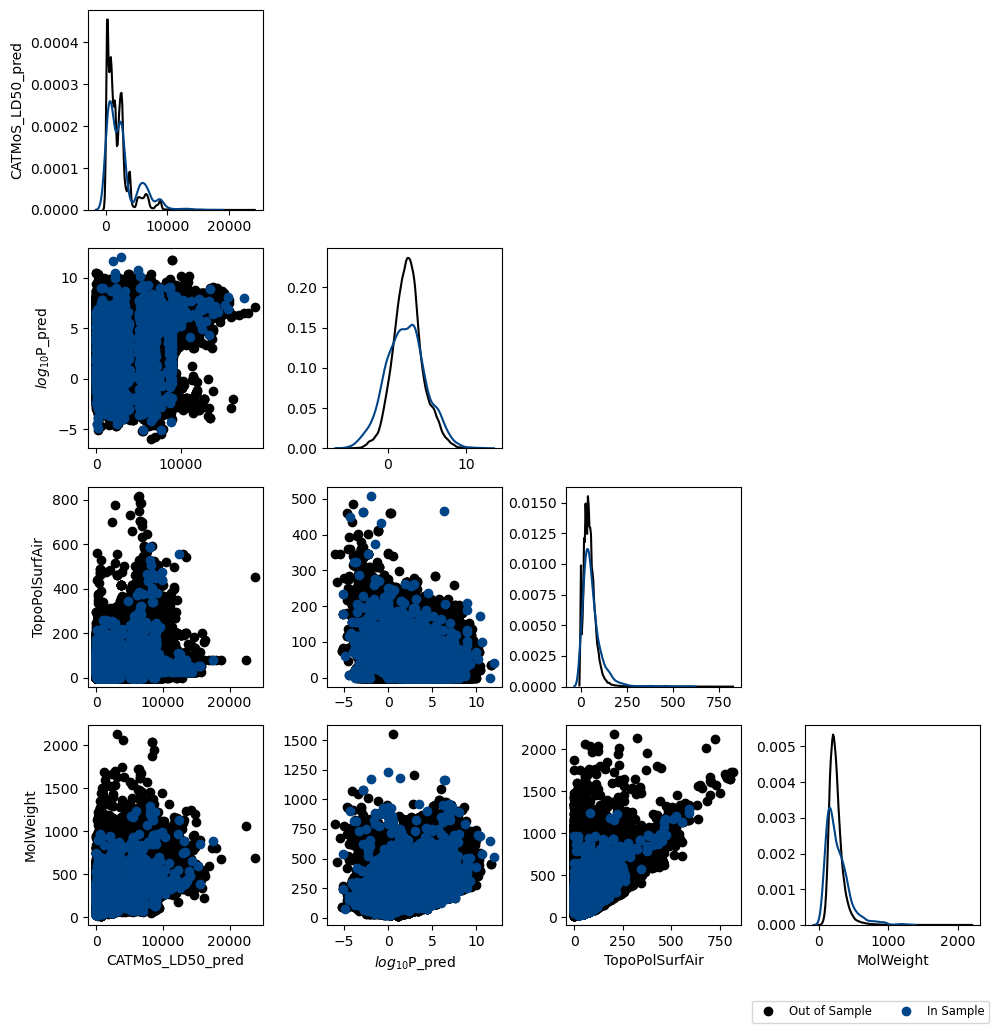

In [3]:
plot.pairwise_scatters_and_kde_subplots(
    workflow.file_for_features_source['opera'], 
    workflow.surrogate_pods_file
)

## Feature importances

Saving figure --> "Figures\important_feature_counts\opera-predicted-missing-with_selection-RandomForestRegressor.png"


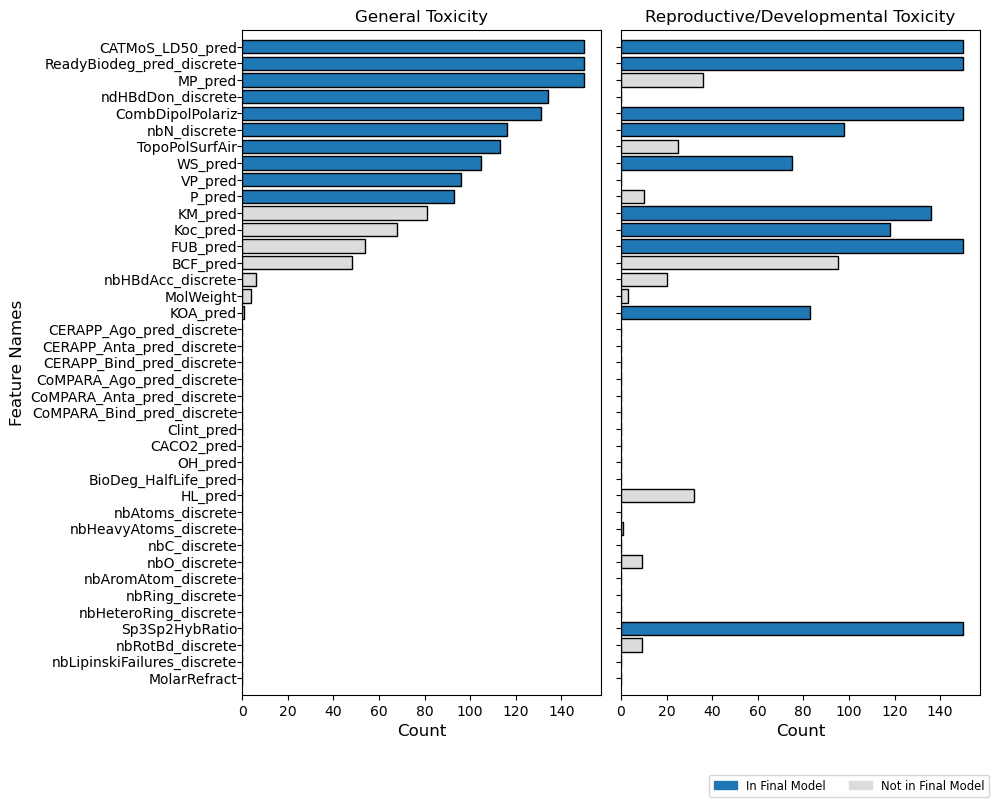

In [4]:
plot.important_feature_counts(
    workflow, 
    config.label_for_effect, 
    config.feature_names_label
)

## Feature importances

Saving figure --> "Figures\importances_boxplots\general-opera-predicted-missing-with_selection-RandomForestRegressor.png"
Saving figure --> "Figures\importances_boxplots\repro_dev-opera-predicted-missing-with_selection-RandomForestRegressor.png"


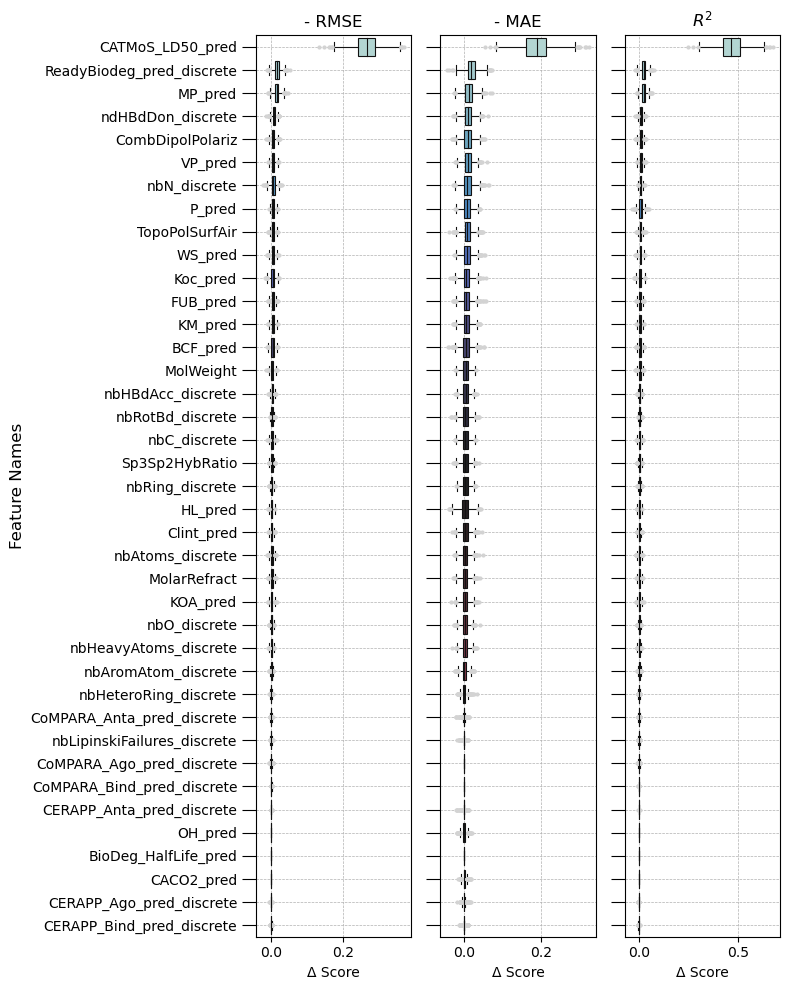

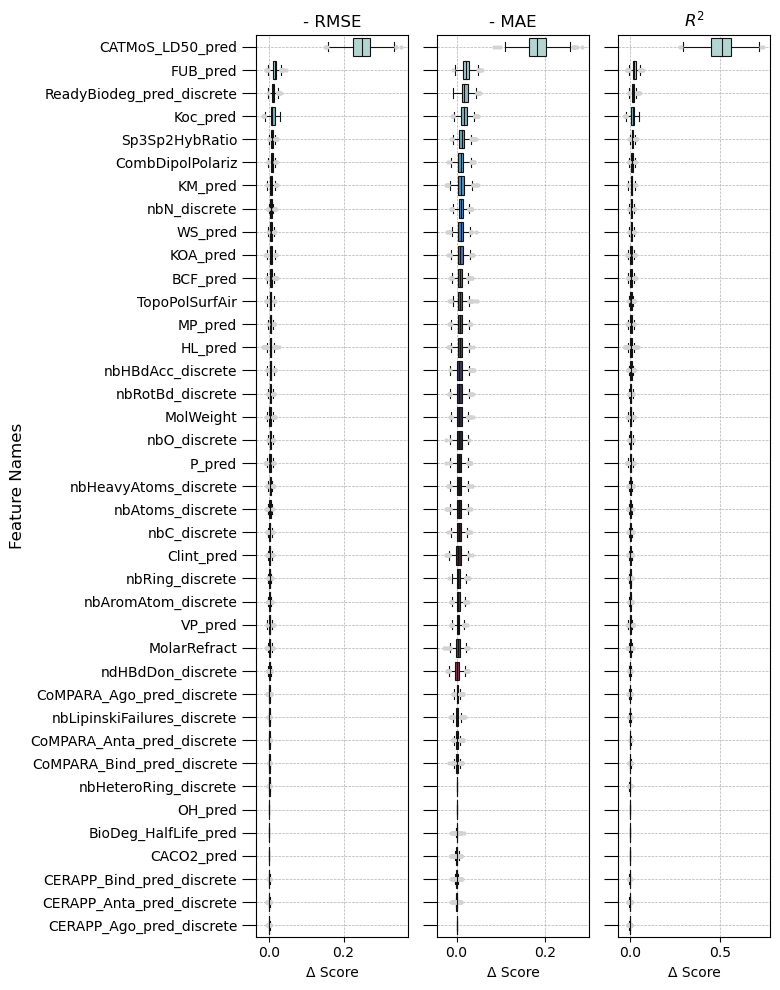

In [5]:
plot.importances_boxplots(
    workflow, 
    config.label_for_scoring, 
    config.feature_names_label
)

Saving figure --> "Figures\importances_replicates_boxplots\general-opera-predicted-missing-with_selection-RandomForestRegressor.png"
Saving figure --> "Figures\importances_replicates_boxplots\repro_dev-opera-predicted-missing-with_selection-RandomForestRegressor.png"


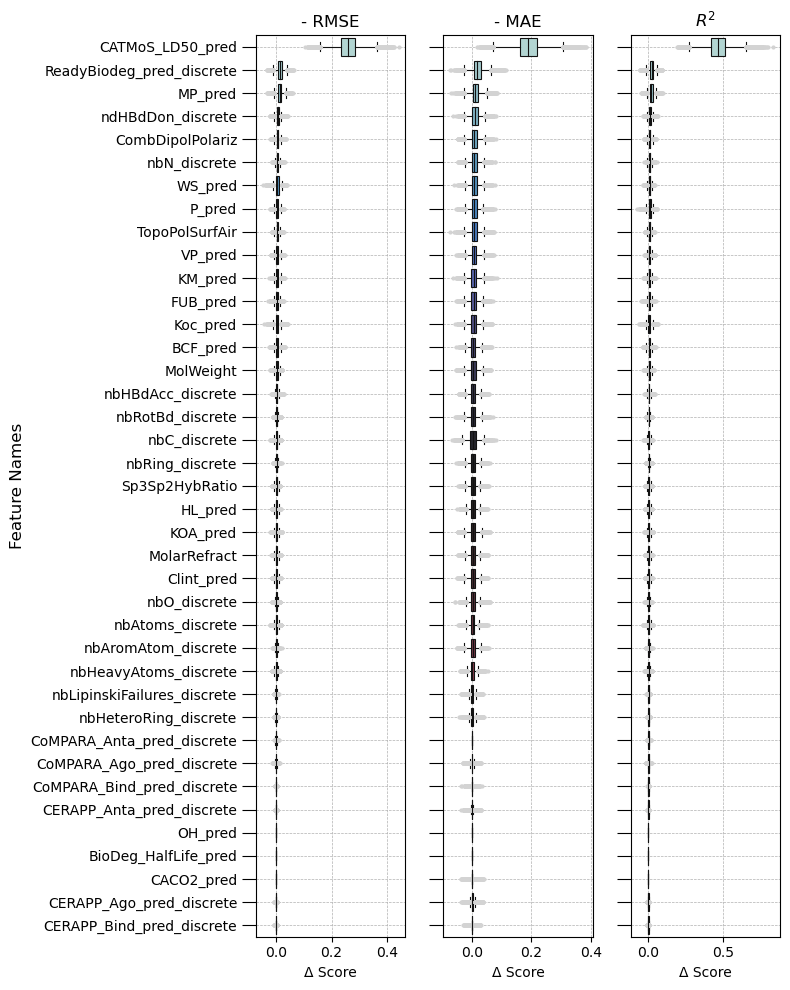

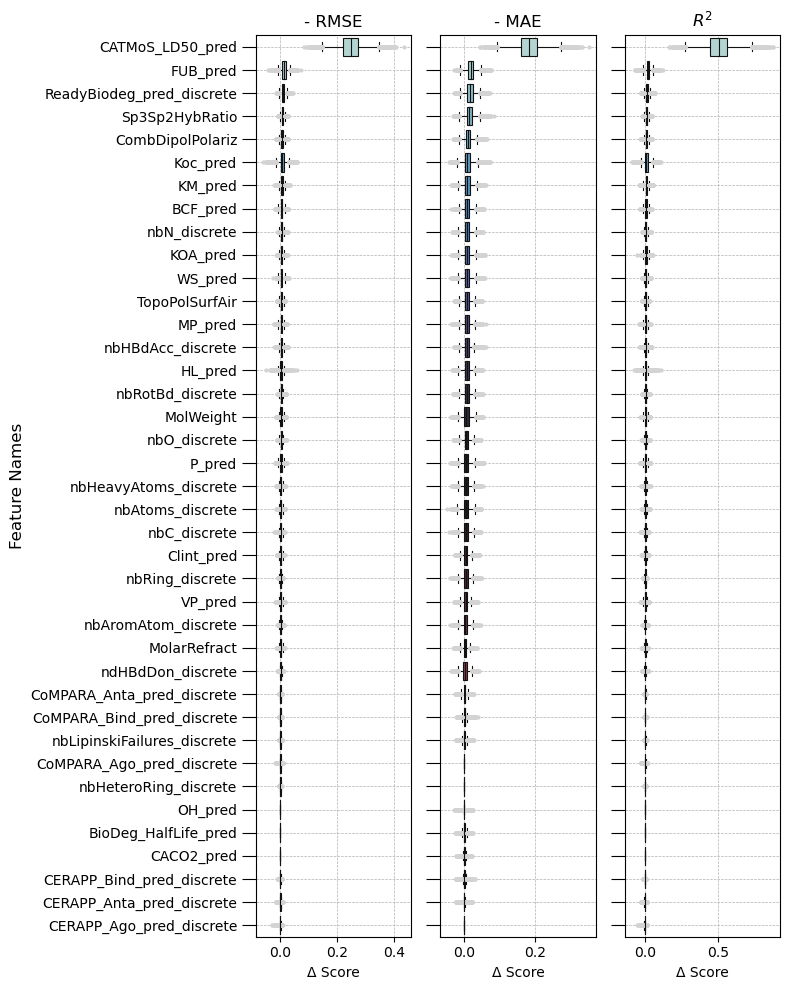

In [6]:
plot.importances_replicates_boxplots(
    workflow, 
    config.label_for_scoring,
    config.feature_names_label
)

## Model performance

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\lcia_qsar\plot.py:550: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs1.tight_layout(fig, rect=[0, 0, 0.7, 1])
C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\lcia_qsar\plot.py:551: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0.7, 0, 1, 1], h_pad=0.5)


Saving figure --> "Figures\in_sample_performance_comparisons\opera-predicted-missing-RandomForestRegressor.png"
Saving figure --> "Figures\out_of_sample_prediction_scatterplots\opera-predicted-missing-RandomForestRegressor.png"


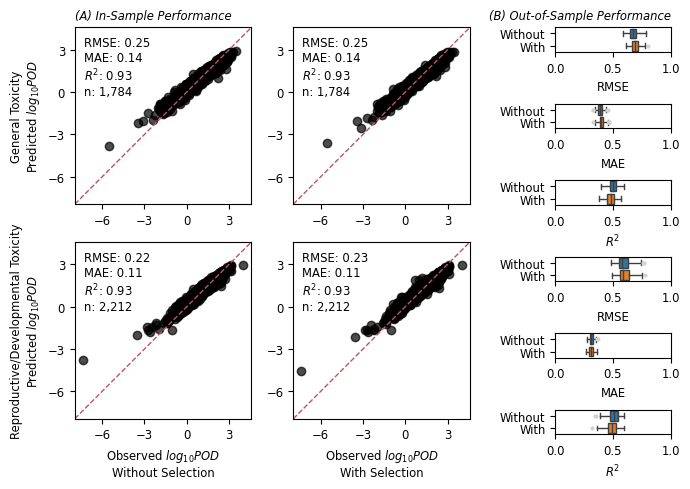

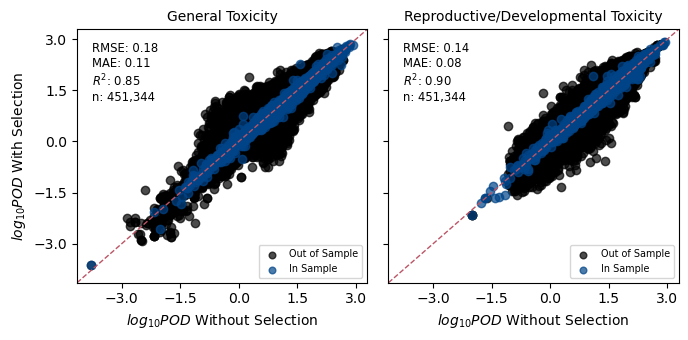

In [7]:
plot.in_and_out_sample_comparisons(
    workflow,
    config.label_for_metric, 
    config.label_for_model_build,
    config.label_for_effect,
    config.prediction_label
)

## Model performance: Benchmarking

"See if ToxCast or our QSAR is better at predicting regulatory PODs."

### Define the results to compare

1. `y_true`: Regulatory PODs 
2. `y_nicolo`: Surrogate PODs
3. `y_final_model`: Defined previously
4. `y_toxcast`: Oral equivalent dose for active Toxcast assays (thanks to En-Hsuan)

Use the intersection of chemicals across all four datasets for a fair comparison.

Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-with_selection-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-without_selection-RandomForestRegressor.png"


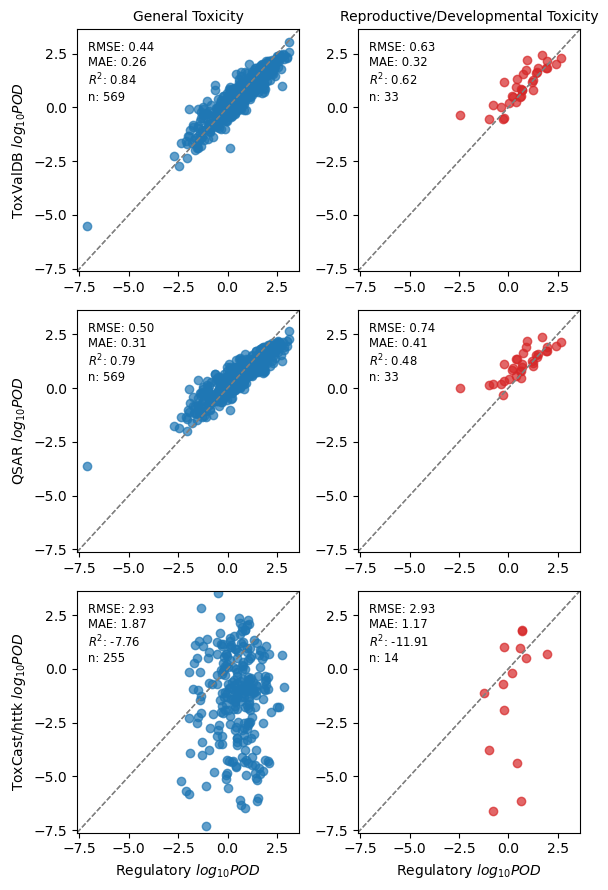

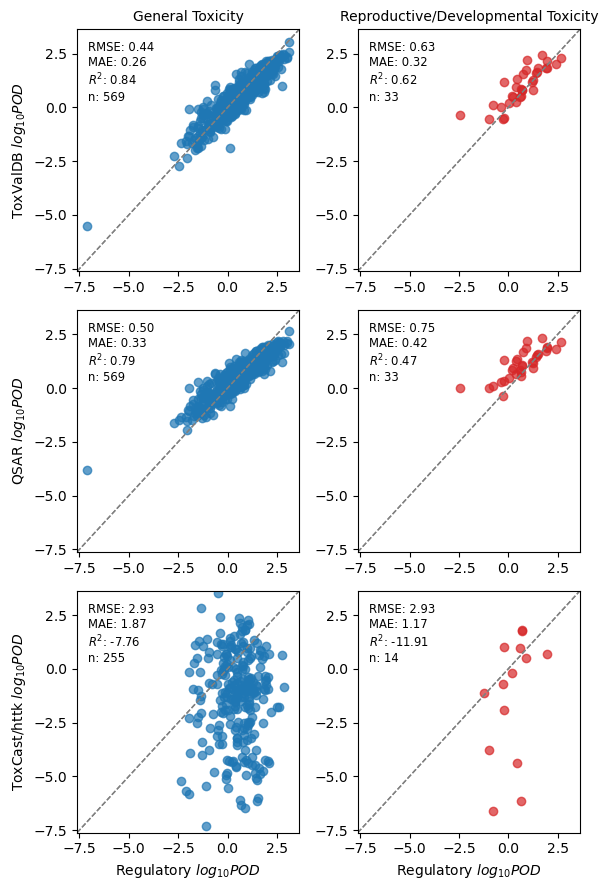

In [8]:
y_regulatory_df = pd.read_csv(workflow.regulatory_pods_file, index_col=0)

y_toxcast = (
    pd.read_csv(workflow.toxcast_oeds_file, index_col=0)
    ['tox_httk_50']
)

plot.benchmarking_scatterplots(
    workflow,
    y_regulatory_df,
    y_toxcast,
    config.label_for_effect,
    config.color_for_effect,
    config.label_for_metric,
    config.prediction_label
)

## SEEM3 exposure predictions

In [9]:
%%time

sorted_data_columns = [
    '95th percentile (mg/kg/day)',
    '50th percentile (mg/kg/day)',
    '5th percentile (mg/kg/day)'
]

exposure_df = (
    pd.read_csv(
        workflow.seem3_exposure_file,
        encoding='latin-1',
        index_col='DTXSID')
    [sorted_data_columns]
)

exposure_df

CPU times: total: 1.05 s
Wall time: 1.08 s


,95th percentile (mg/kg/day),50th percentile (mg/kg/day),5th percentile (mg/kg/day)
DTXSID,,,
DTXSID9047623,1.934704e+05,8.003709e+00,1.345270e-07
DTXSID0052700,1.062910e-04,1.981730e-07,4.206030e-09
DTXSID00583560,4.651770e-05,1.030910e-07,3.829040e-09
DTXSID00859050,1.266260e-04,4.509380e-07,4.619460e-09
DTXSID00860464,1.784700e-04,1.139580e-06,6.695920e-09
...,...,...,...
DTXSID3038307,1.883090e-12,2.765100e-15,2.167240e-17
DTXSID8038300,1.775240e-12,5.454110e-15,3.572030e-17
DTXSID8074158,1.103070e-12,3.702030e-15,2.954430e-17


Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-with_selection-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-without_selection-RandomForestRegressor.png"


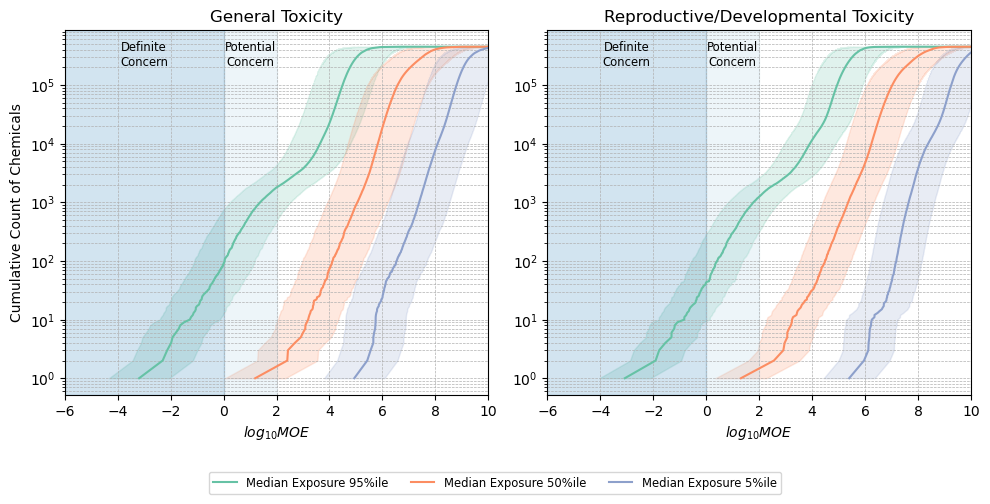

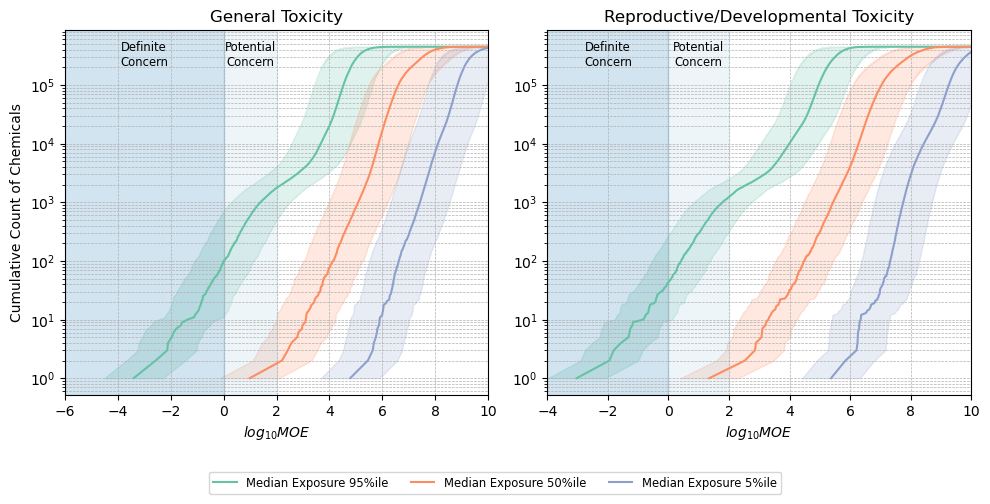

In [10]:
plot.margins_of_exposure_cumulative(
    workflow, 
    exposure_df,
    config.label_for_effect, 
    config.label_for_exposure_column,
    right_truncation=10.
)

## Next steps
- Expand model application to ~450,000 chemicals within SEEM3’s domain of applicability
- Sensitivity analysis ("one at a time")

Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-with_selection-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-without_selection-RandomForestRegressor.png"


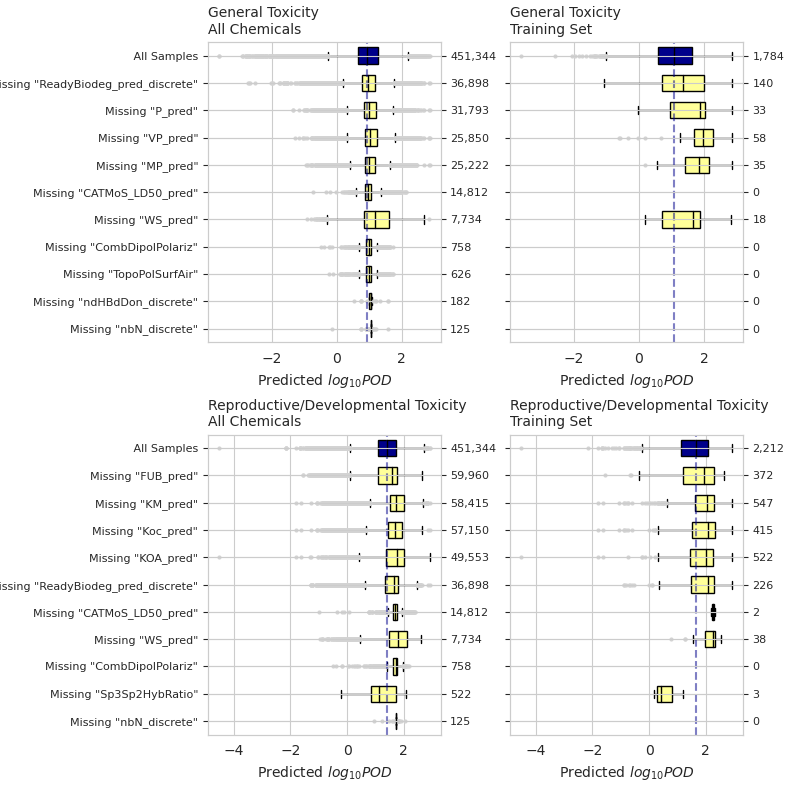

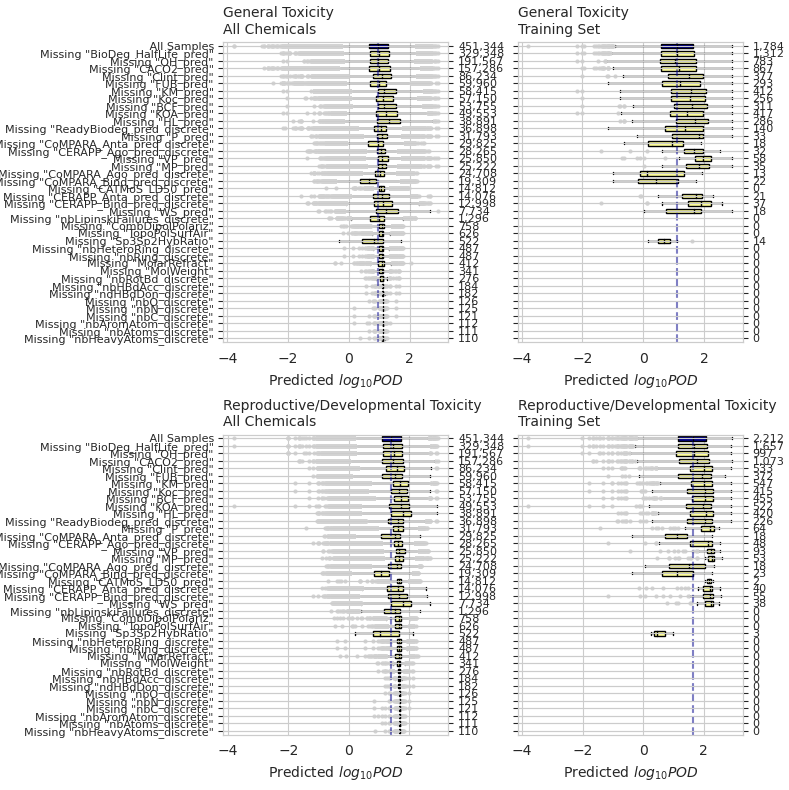

In [11]:
plot.predictions_by_missing_feature(
    workflow, 
    config.label_for_effect,
    config.prediction_label
)